In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy
import math
# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [4]:

def fieldupdate3(T=10,size=100,E=ez,H=hy):
    imp0=377
    E_history=[]
    H_history=[]
    test=[]
    for t in range(T):
        for i in range(len(E)-1):
            H[i]=H[i]+(E[i+1]-E[i])/imp0
        for j in range(len(E)-1):
            E[j+1]=E[j+1]+(H[j+1]-H[j])*imp0

        E[0]=math.exp(-(t-0.3*size)*(t-0.3*size)/100)
        test.append(E[int(0.5*size)])
        E_history.append(E.copy())
        H_history.append(H.copy())
    with open("E field history.txt", 'w') as f:
        for member in E_history:
            f.write(str(member) + '\n')
    with open("H field history.txt", 'w') as f:
        for member in H_history:
            f.write(str(member) + '\n')
    E_history=np.array(E_history)
    return E,H,test, E_history



In [3]:
size=100
ez=np.zeros(size)
hy=np.zeros(size)
#ez[50]=1

In [6]:
EZ,HY,test,E_history=fieldupdate3(100,size,ez,hy)
print(type(E_history))
E_new=E_history.copy().reshape(-1)
print(E_new.shape)
for i in range(100):
    print(E_history[i][50])
print(test)

<class 'numpy.ndarray'>
(10000,)
0.01831563888873418
0.012155178329914935
0.007907054051593441
0.005041760259690979
0.0031511115984444414
0.0019304541362277093
0.0011592291739045914
0.0006823280527563766
0.0003936690406550783
0.00022262985691888894
0.00012340980408667956
6.705482430281112e-05
3.571284964163521e-05
1.864374233151682e-05
9.54016287307923e-06
4.785117392129009e-06
2.352575200009771e-06
1.1337271387479661e-06
5.355347802793109e-07
2.479596018045028e-07
1.1253517471925913e-07
5.006218020767049e-08
2.182957795125478e-08
9.330287574505005e-09
3.908938434264864e-09
1.6052280551856119e-09
6.461431773106109e-10
2.549381880391969e-10
9.859505575991516e-11
3.7375713279442554e-11
1.3887943864964021e-11
5.058252742843785e-12
1.8058314375132173e-12
6.319285885175369e-13
2.1675688826189615e-13
7.287724095819693e-14
2.4017347816209608e-14
7.758402075696057e-15
2.4565953687921433e-15
7.624459905389722e-16
2.3195228302435696e-16
6.916753975541441e-17
2.0217158486953473e-17
5.792312885394

In [7]:

X=[]
Y=[]
for i in range(100):
    for j in range(100):
        X.append(i)
        Y.append(j)
X=np.array(X)
Y=np.array(Y)
#print(test)

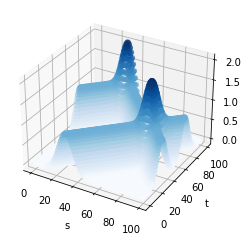

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = E_new
xdata = X
ydata = Y
plt.xlabel('s')
plt.ylabel('t')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Blues');


In [ ]:

plt.plot(test)
plt.xlabel('Time Step')
plt.ylabel('EZ(50)(mV)')
plt.show()

In [ ]:

#plot for final states
plt.plot(EZ)
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()
plt.plot(HY)
plt.xlabel('Spetial Step')
plt.ylabel('HY(mH)')
#plt.ylabel('some numbers')
plt.show()# 

In [ ]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.zeros(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
plt.plot(E_history[])
plt.xlabel('Spetial Step')
plt.ylabel('EZ(mV)')
plt.show()

In [ ]:
file= open("E field history.txt", "r")
data=file.read()
print((data))